# Neural Analysis

Esta atividade consiste em identificar e classificar sinais biológicos a partir dos dados obtidos por meio de um equipamento que realiza a medição de sinais neurais de pessoas enquanto as mesmas jogavam um jogo. Tal experimento foi realizado para compor o trabalho de mestrado de Adam, do Warthog Robotics.

Tal atividade foi realizada como segundo trabalho prático da disciplina de Inteligência Artificial ministrada pela professora Solange Rezende no 1° Semestre de 2019 na USP de São Carlos.

## Introdução Teórica

Os dados obtidos consistem em sinais neurais advindos de um capacete utilizado para eletroencefalografia que utiliza o padrão 20-10 para colocação dos sensores. Desse modo, a seguinte imagem descreve a maneira com a qual os sensores estavam distribuídos na cabeça de cada um dos utilizadores.

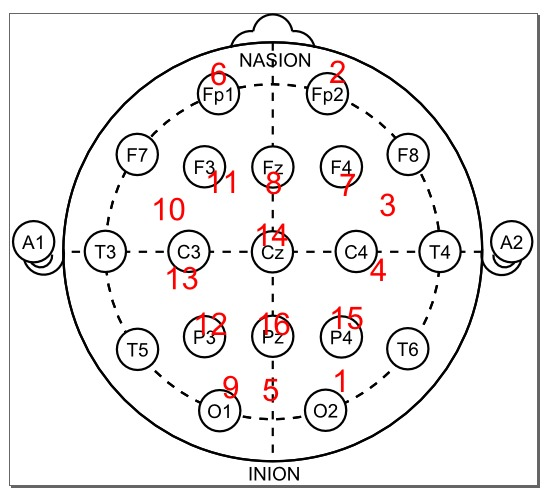

Este experimento foi realizado com 8 pessoas diferentes, cada uma delas fornece quatro bases de dados. Durante o experimento, as mesmas deveriam jogar um jogo...

O projeto consiste em:

- Identificar, de modo manual, as características que definem os sinais biológicos que queremos extrair e extrair os sinais com esses valores da nossa base.
- Clusterizar esses sinais para tentar modelar as características principais.
- Colocar esses dados em um classificador e rodar o classificador nos dados para tentar realizar a identificação automática.

Para os cabras do meu grupo, precisa fazer o seguinte:

- Filtrar piscada e olho e batida de coração.
- Jogar num K-Means e outros clusterizadores para encontrar 3 ou 4 grupos dentro dos dados que pegamos.
- Classificar e então jogar num classificador supervisionado para ele aprender.
- Rodar o classificador nos dados.
- Printar os resultados e avaliar se conseguimos ou não identificar os artefatos biológicos.

## Obtenção dos dados

Os dados estão salvos como um arquivo .csv dentro da pasta data. Eles serão importados para iniciar os trabalhos de análise dos mesmos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#import warnings
#warnings.filterwarnings('ignore')

Funções para cálculo de dft, idft e filtragem de dados:

In [2]:
import numpy as np
from scipy.signal import butter, filtfilt

def mydft(sample_frq, time_domain):

    sample_interval = 1.0/sample_frq;
    samples = len(time_domain) # length of the signal
    k = np.arange(samples) 
    frq_range = k*(sample_frq/samples) # two sides frequency range
    frq_domain = np.fft.fft(time_domain)/samples # DFT computing and normalization

    return (frq_range, frq_domain)

def myidft(frq_domain):
    samples = len(frq_domain) # length of the signal
    time_domain = np.fft.ifft(samples*frq_domain) # Denormalization and IDFT computing
    return time_domain

def myfilter(sample_frq, time_domain, pass_interval, order=5, band_stop=False):
    if(band_stop):
        ftype = "bandstop"
    else:
        if(len(pass_interval) == 1):
            ftype = "highpass"
        elif(pass_interval[0] == 0):
            ftype = "lowpass"
        else:
            ftype = "bandpass"
    
    if(ftype == "bandpass" or ftype == "bandstop"):
        norm_frq = []
        for f in pass_interval:
            norm_frq.append(f/((sample_frq/2))) # normalizing with the nyquist frequency
    elif(ftype == "lowpass"):
        norm_frq = pass_interval[1] / (sample_frq/2)
    else:
        norm_frq = pass_interval[0] / (sample_frq/2)
        
    
    b, a = butter(N=order, Wn=norm_frq, btype=ftype, analog=False)
    
    filtered_time_domain = filtfilt(b, a, time_domain)
    
    return filtered_time_domain

In [2]:
#def frequency_filter(y, Fs):
#    plt.figure(figsize=(20,10))
    
#    N = len(y)
#    T = 1/Fs
#    x = np.linspace(0, N*T, N)
    
#    y_fft = np.fft.fft(y)
#    x_fft = np.linspace(0,1/(2*T),N/2)
    
#    singlefft = (2/N)*np.abs(y_fft[:N//2])
#    sns.lineplot(x_fft,singlefft)
#    return singlefft, x_fft

#from scipy.signal import butter, lfilter

#def butter_bandpass(lowcut, highcut, fs, order=5):
#    nyq = 0.5 * (fs)
#    low = lowcut / nyq
#    high = highcut / nyq
#    b, a = butter(order, [low, high], btype='band')
#    return b, a

#def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
#    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#    y = lfilter(b, a, data)
#    return y

In [3]:
df_neural = pd.read_csv("data/recordRaw-[2018.11.16-10.16.29].csv")
df_neural

,Time:512Hz,Epoch,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,...,Channel 10,Channel 11,Channel 12,Channel 13,Channel 14,Channel 15,Channel 16,Event Id,Event Date,Event Duration
0,0.000000,0,-104797280.0,-31468.654297,-125853.765625,-104797280.0,-104797280.0,68638.679688,61334.183594,-107463.726562,...,-1.836734e+04,67942.195312,-104797280.0,-104797280.0,47687.062500,14813.770508,-104797280.0,NaN,NaN,NaN
1,0.001953,0,-104797048.0,-31445.656250,-125829.890625,-104797048.0,-104797048.0,68646.632812,61358.648438,-107438.632812,...,-1.804248e+04,68010.796875,-104797048.0,-104797048.0,47718.019531,14846.583008,-104797048.0,NaN,NaN,NaN
2,0.003906,0,-104796432.0,-31431.007812,-125838.531250,-104796432.0,-104796432.0,68623.054688,61354.398438,-107447.960938,...,-1.756045e+04,68068.171875,-104796432.0,-104796432.0,47744.925781,14887.793945,-104796432.0,NaN,NaN,NaN
3,0.005859,0,-104795864.0,-31421.486328,-125844.835938,-104795864.0,-104795864.0,68608.742188,61346.441406,-107460.992188,...,-1.730254e+04,68082.914062,-104795864.0,-104795864.0,47722.855469,14871.778320,-104795864.0,NaN,NaN,NaN
4,0.007812,0,-104795496.0,-31453.273438,-125840.585938,-104795496.0,-104795496.0,68610.750000,61346.246094,-107458.312500,...,-1.720850e+04,68107.429688,-104795496.0,-104795496.0,47709.132812,14869.141602,-104795496.0,NaN,NaN,NaN
5,0.009766,0,-104795664.0,-31443.703125,-125829.062500,-104795664.0,-104795664.0,68618.218750,61367.289062,-107434.335938,...,-1.741314e+04,68096.195312,-104795664.0,-104795664.0,47703.128906,14857.666992,-104795664.0,NaN,NaN,NaN
6,0.011719,0,-104796256.0,-31444.093750,-125847.765625,-104796256.0,-104796256.0,68627.445312,61355.667969,-107449.226562,...,-1.787114e+04,67997.804688,-104796256.0,-104796256.0,47642.777344,14825.586914,-104796256.0,NaN,NaN,NaN
7,0.013672,0,-104796880.0,-31437.013672,-125837.507812,-104796880.0,-104796880.0,68644.000000,61368.851562,-107435.015625,...,-1.818594e+04,68008.890625,-104796880.0,-104796880.0,47652.003906,14829.541992,-104796880.0,NaN,NaN,NaN
8,0.015625,0,-104797224.0,-31450.490234,-125844.687500,-104797224.0,-104797224.0,68615.437500,61356.253906,-107450.984375,...,-1.832632e+04,68000.789062,-104797224.0,-104797224.0,47634.718750,14823.536133,-104797224.0,NaN,NaN,NaN
9,0.017578,0,-104797168.0,-31418.410156,-125816.023438,-104797168.0,-104797168.0,68646.492188,61383.109375,-107424.273438,...,-1.821846e+04,68039.601562,-104797168.0,-104797168.0,47671.781250,14836.866211,-104797168.0,NaN,NaN,NaN


In [4]:
df_neural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54368 entries, 0 to 54367
Data columns (total 21 columns):
Time:512Hz        54368 non-null float64
Epoch             54368 non-null int64
Channel 1         54368 non-null float64
Channel 2         54368 non-null float64
Channel 3         54368 non-null float64
Channel 4         54368 non-null float64
Channel 5         54368 non-null float64
Channel 6         54368 non-null float64
Channel 7         54368 non-null float64
Channel 8         54368 non-null float64
Channel 9         54368 non-null float64
Channel 10        54368 non-null float64
Channel 11        54368 non-null float64
Channel 12        54368 non-null float64
Channel 13        54368 non-null float64
Channel 14        54368 non-null float64
Channel 15        54368 non-null float64
Channel 16        54368 non-null float64
Event Id          0 non-null float64
Event Date        0 non-null float64
Event Duration    0 non-null float64
dtypes: float64(20), int64(1)
memory usage: 

## Tratando os dados

Como nós podemos ver, existem três colunas (Event Id, Event Date e Event Duration) que tem valores nulos para todas as entradas, além disso, conforme exposto na introdução teórica, alguns sensores podem ser desconsiderados.

In [5]:
#df_neural = df_neural.drop(["Event Id", "Event Date", "Event Duration", "Channel 1","Channel 4",
                            #"Channel 5","Channel 9","Channel 12","Channel 13", "Channel 16"], axis=1)
#df_neural

## Analisando os dados

Vamos analisar os dados que ainda temos para verificar se podemos identificar algumas características.

In [6]:
df_neural.describe()

,Time:512Hz,Epoch,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,...,Channel 10,Channel 11,Channel 12,Channel 13,Channel 14,Channel 15,Channel 16,Event Id,Event Date,Event Duration
count,54368.000000,54368.000000,5.436800e+04,54368.000000,54368.000000,5.436800e+04,5.436800e+04,54368.000000,54368.000000,54368.000000,...,5.436800e+04,54368.000000,5.436800e+04,5.436800e+04,54368.000000,5.436800e+04,5.436800e+04,0.0,0.0,0.0
mean,53.092773,849.000000,-1.048025e+08,-33037.728284,-124378.714743,-1.048025e+08,-1.048025e+08,67418.189380,68457.271626,-108798.978031,...,-1.934815e+06,66779.214954,-1.048025e+08,-1.048025e+08,34864.436411,-3.141336e+06,-1.048025e+08,NaN,NaN,NaN
std,30.653973,490.463479,3.496102e+03,647.828785,1495.156517,3.496102e+03,3.496102e+03,1225.346847,5031.156333,790.755097,...,1.377790e+07,1062.082387,3.496102e+03,3.496102e+03,8511.742391,1.785566e+07,3.496102e+03,NaN,NaN,NaN
min,0.000000,0.000000,-1.048093e+08,-34104.738281,-126418.320312,-1.048093e+08,-1.048093e+08,64641.851562,61322.757812,-110497.273438,...,-1.048093e+08,64160.453125,-1.048093e+08,-1.048093e+08,19392.873047,-1.048022e+08,-1.048093e+08,NaN,NaN,NaN
25%,26.546387,424.000000,-1.048054e+08,-33446.207031,-125909.152344,-1.048054e+08,-1.048054e+08,66621.136719,62372.087891,-109257.941406,...,-1.184195e+05,66160.648438,-1.048054e+08,-1.048054e+08,27300.612305,-8.516383e+03,-1.048054e+08,NaN,NaN,NaN
50%,53.092773,849.000000,-1.048027e+08,-33306.644531,-123872.324219,-1.048027e+08,-1.048027e+08,67509.015625,71092.144531,-108759.531250,...,-1.015985e+05,66677.445312,-1.048027e+08,-1.048027e+08,37076.345703,-1.128516e+03,-1.048027e+08,NaN,NaN,NaN
75%,79.639160,1274.000000,-1.047997e+08,-32779.666992,-122819.041016,-1.047997e+08,-1.047997e+08,68431.281250,73166.414062,-108321.882812,...,-4.164521e+04,67360.378906,-1.047997e+08,-1.047997e+08,40698.268555,1.223120e+03,-1.047997e+08,NaN,NaN,NaN
max,106.185547,1698.000000,-1.047955e+08,-31227.492188,-122633.164062,-1.047955e+08,-1.047955e+08,69493.507812,74430.179688,-107307.429688,...,-8.205177e+03,68930.132812,-1.047955e+08,-1.047955e+08,47747.855469,1.496035e+04,-1.047955e+08,NaN,NaN,NaN


Vamos começar deixando registrado qual o formato dos dados no domínio do tempo.

In [7]:
#for i in range(17):
#    if(i == 0):
#        continue
#    plt.figure()
#    string = "Channel {}".format(i)
#    sns.lineplot(df_neural["Time:512Hz"],df_neural[string])


Agora, vamos olhar os dados no domínio da frequência usando dois tipos de transformadas diferentes: a Transformada de Fourier (FFT) e fazendo o diagrama de Bode dos canais.

In [8]:
#for i in range(17):
#    if(i == 0):
#        continue
#    plt.figure()
#    string = "Channel {}".format(i)
#    sns.lineplot((np.log10(2*3.14/df_neural["Time:512Hz"])),np.log10(np.fft.fft(df_neural[string])))

In [9]:
#for i in range(17):
#    if(i == 0):
#        continue
#    plt.figure()
#    string = "Channel {}".format(i)
#    sns.lineplot((2*3.14/df_neural["Time:512Hz"]),np.fft.fft(df_neural[string]))

## Extraindo os dados com filtros

In [6]:
df_knn = df_neural.drop(["Epoch","Event Id", "Event Date", "Event Duration"], axis=1)

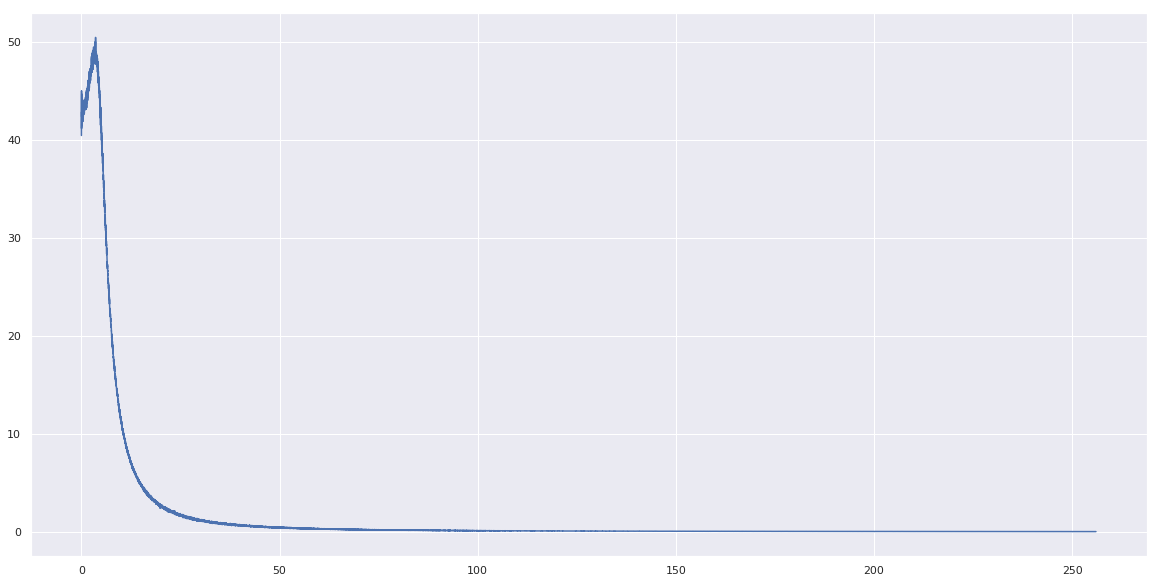

In [58]:
#Y_filtered = butter_bandpass_filter(df_knn["Channel 6"], 3, 8, 512, order=1)
#Y, X = frequency_filter(Y_filtered,512)

### Aplicando o filtro

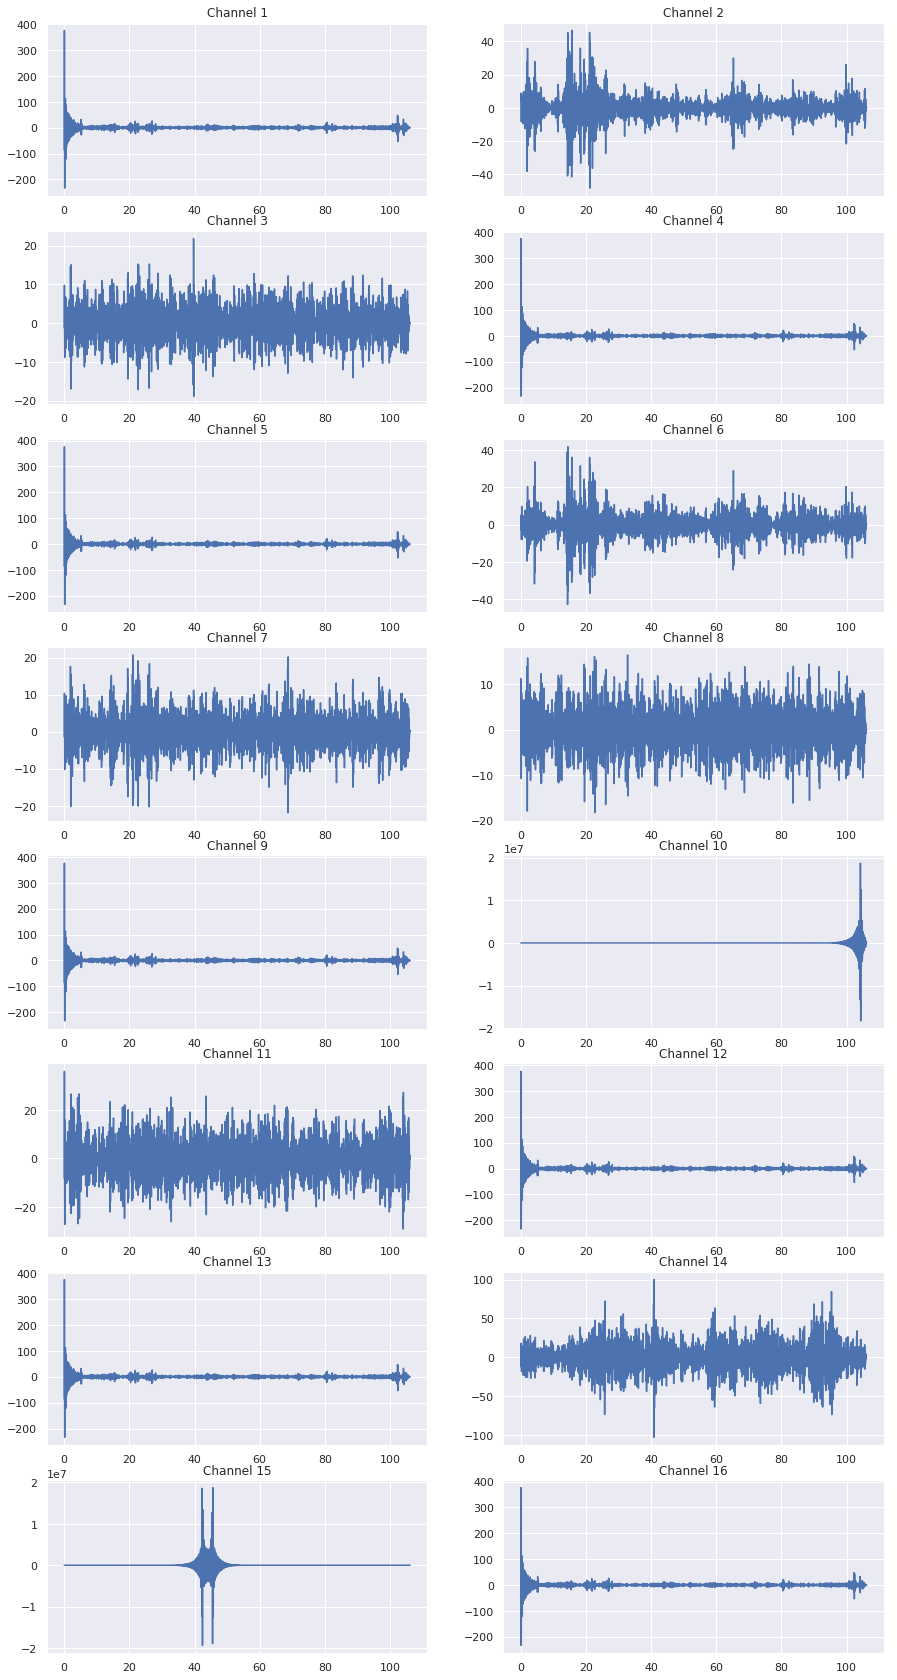

In [21]:
knn_filtered = pd.DataFrame()
knn_filtered["Time"] = df_knn['Time:512Hz']

for i in range(1,17):
    string = "Channel {}".format(i)
    filtered = myfilter(512, df_knn[string], [4.0, 7.0])
    knn_filtered[string] = filtered

fig, ax = plt.subplots(8, 2, figsize=(15,30))
for i in range(1,17):
    string = "Channel {}".format(i)
    ax[int((i-1)/2)][(i-1)%2].plot(knn_filtered["Time"], knn_filtered[string])
    ax[int((i-1)/2)][(i-1)%2].set_title(string)

In [23]:
print(Y_filtered)

[ 0.0016919   0.01824518  0.09882762 ... -1.58720356 -1.43545541
 -1.28040391]


In [24]:
df_neural["Channel 6"]

0        68638.679688
1        68646.632812
2        68623.054688
3        68608.742188
4        68610.750000
5        68618.218750
6        68627.445312
7        68644.000000
8        68615.437500
9        68646.492188
10       68632.867188
11       68645.414062
12       68644.976562
13       68640.046875
14       68661.671875
15       68634.523438
16       68610.015625
17       68681.304688
18       68622.468750
19       68619.484375
20       68650.882812
21       68612.062500
22       68610.750000
23       68615.335938
24       68621.343750
25       68644.093750
26       68671.539062
27       68632.867188
28       68670.757812
29       68654.640625
             ...     
54338    64730.472656
54339    64732.230469
54340    64690.921875
54341    64710.992188
54342    64677.933594
54343    64671.148438
54344    64708.160156
54345    64722.953125
54346    64731.546875
54347    64746.050781
54348    64759.378906
54349    64744.976562
54350    64735.015625
54351    64720.660156
54352    6

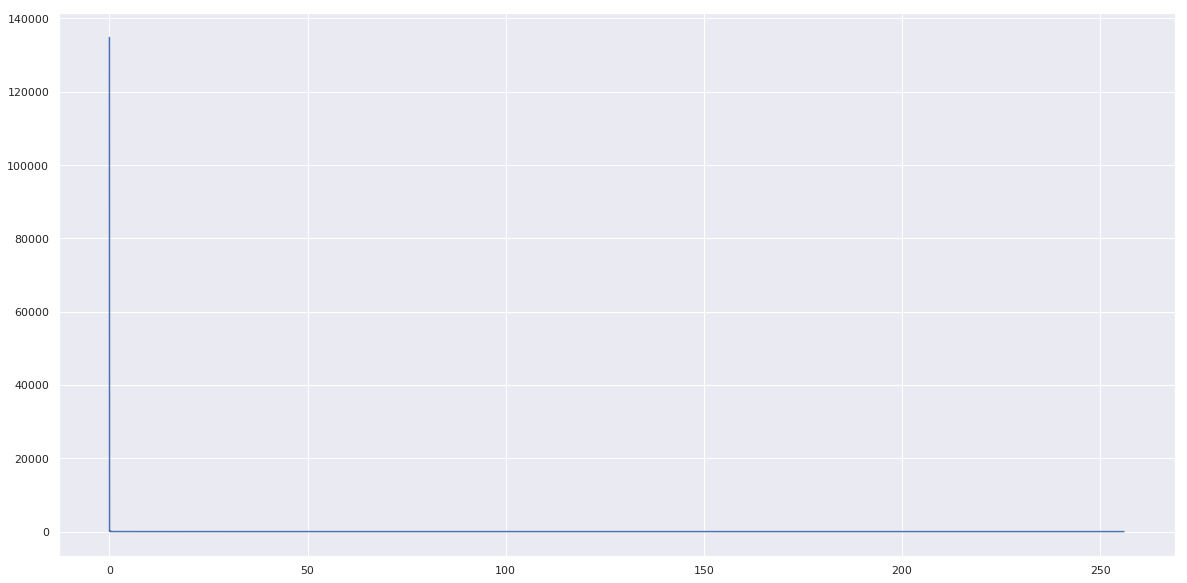

In [25]:
X, Y = frequency_filter(df_neural["Channel 6"], 512)

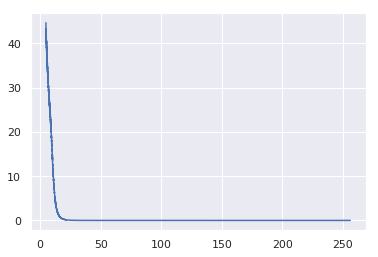

In [49]:
sns.lineplot(X[500:],Y[500:])

In [57]:
Y_PD = pd.DataFrame(Y)
Y_FPD = pd.DataFrame(Y_filtered)

Y_PD.to_csv("1.csv")
Y_FPD.to_csv("2.csv")

In [45]:
df_neural["Channel 6"].to_csv("channel6.csv")